# Assignment 1: Search Algorithms


## Deliverables:
    1) Make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly
       generated uniformly distributed integers from 1 to 10000. 
       You may use the numpy package for this.  

    2) Sort each of the random number arrays from smallest to largest. 
       You may use any algorithm to sort the data.

    3) Execute the base search algorithm (binary search) (from the text and github code) 
       for each of array, noting the execution time for each array.  With each execution
       use the maximum value of the random number array as the number for which you are searching.

    4) Use python (perhaps with the Pandas package) to prepare a five-column table containing
       the following columns with all times in milliseconds:
    
                    length of the random number array
                    sort time
                    linear search time for the sorted array
                    binary search time for the sorted array
                    binary search plus sort times

    5) Use python matplotlib or Seaborn to generate a plot with the size of the random number array on the horizontal axis
     and with execution time in milliseconds on the vertical axis. The plot should show execution time against
     array size for linear and binary search algorithms alone.  Discuss the results.

    6) Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis
     and with execution time in milliseconds on the vertical axis. The plot should show execution time against
     array size for each form of the algorithm being tested (last four columns of the table).  Discuss the results.


## Code adapted from:
Bhargava, Aditya. Grokking Algorithms. Manning Publications, 2016.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import time




In [2]:
np.random.seed(5)

In [3]:
#function Generate Array generates an array of given size that contains random integers between 1 and 10,000. The function sorts and returns the array and the time required to perform the sort. Default sort kind for the generated numpy array is mergesort, but user can override.
def GenerateArray(size, rg_low=1, rg_high=10000, sort_kind='mergesort'):
    
    GenArray = np.random.randint(low=rg_low, high= rg_high, size=size)
    start =  time.perf_counter() #datetime.utcnow()
    GenArray.sort(kind=sort_kind) 
    end = time.perf_counter() #datetime.utcnow()

    ArraySortTime = (end-start)*1E3 #.total_seconds()*1E3
    return (GenArray, ArraySortTime)


In [4]:
#function SimpleSearch uses a value counter "low" which increments after a non successful evalution of equivalence for the item within a given array. It returns the milliseconds elapsed and a register of all the incremental guesses.
def SimpleSearch(array, item):
    
    register = [] # creates  empty register of guesses
    low = 1
    start = time.perf_counter() # gets fractional seconds
    while item > low:
            low += 1 #increments low
            register.append(low) # appends incremental guesses to register
 
    end = time.perf_counter() # gets fractional seconds
    duration = end - start # calcualates difference in fractional seconds
    MilliElapsed = duration*1E3
 # returns a tuple which contains search time in milliseconds and register of the guesses
    return MilliElapsed, register

In [5]:
#function BinarySearch determines the range of the array and guwsses the midpoint of the range. A loop continues to to perform iterative range evaluations so long as the low value is equal or less than the high value of the array. When the gues converges to the item of interest, a tuple is returned with the time elapsed in milliseconds and the register of guesses.
def BinarySearch(array, item):
   
    low = np.min(array) #finds lowest value in array
    high = np.max(array) #finds highest value in array
    register = [] # creates  empty register of increments; for debug purposes
    start = time.perf_counter() # gets fractional seconds
    while low <= high:     
        mid= (low +high)/2  # calculates midpoint of the range
        guess = int(mid)+1  
        register.append(guess) # appends increments to register; for debug purposes
        if guess == item:
                end = time.perf_counter() #datetime.utcnow()
                duration = end - start
                MilliElapsed = duration*1E3 #.total_seconds()*1E3  
#returns a tuple which contains search time in milliseconds and register of the guesses 
                return MilliElapsed, register
        elif guess > item:
                high = mid
                print('The guess went too high!')
        else:
                low = mid
                


In [6]:
# test code for SimpleSearch function

#s = np.random.randint(low=1, high=100, size=10)
#s.sort(kind='mergesort')
#s

#SimpleSearch(list(s),82)

In [7]:
# test code for BinarySearch function
#BinarySearch(five12[0], np.max(five12[0])) #testing the binary search 

## A. Generate and sort arrays
    Function uses mergesort as a default, tuple returned contains the array as first element, time for sorting as the second element

In [8]:
#
five12=GenerateArray(512)
ten24 = GenerateArray(1024)
twenty48 = GenerateArray(2048)
forty96 = GenerateArray(4096)
eight192 = GenerateArray(8192)

print(len(five12[0]), len(ten24[0]), len(twenty48[0]), len(forty96[0]), len(eight192[0]))

512 1024 2048 4096 8192


## B. Simple and Binary Search for arrays of 512, 1024, 2048, 4096 elements

In [9]:
simple_512 = SimpleSearch(five12[0], np.max(five12[0]))
binary_512 = BinarySearch(five12[0], np.max(five12[0]))

simple_1024 = SimpleSearch(ten24[0], np.max(ten24[0]))
binary_1024 = BinarySearch(ten24[0], np.max(ten24[0]))

simple_2048 = SimpleSearch(twenty48[0], np.max(twenty48[0]))
binary_2048 = BinarySearch(twenty48[0], np.max(twenty48[0]))

simple_4096 = SimpleSearch(forty96[0], np.max(forty96[0]))
binary_4096 = BinarySearch(forty96[0], np.max(forty96[0]))

## C. Simple and Binary Search for 8192 elements 
    Code just provided for demonstrative purposes of accessing elements of the ruturned tuple

In [10]:
simple_8192= SimpleSearch(eight192[0], np.max(eight192[0]))

print('SIMPLE SEARCH','Guesses Made:',len(simple_8192[1]), '   Max Guess:', max(simple_8192[1]),
'  Max in array:', max(eight192[0]), ' Duration (ms):', simple_8192[0])

binary_8192 = BinarySearch(eight192[0], np.max(eight192[0]))

print("BINARY SEARCH", 'Guesses Made:',len(binary_8192[1]), '   Max Guess:', max(binary_8192[1]),
'  Max in array:', max(eight192[0]), ' Duration (ms):', binary_8192[0])


SIMPLE SEARCH Guesses Made: 9997    Max Guess: 9998   Max in array: 9998  Duration (ms): 2.9746000000159256
BINARY SEARCH Guesses Made: 14    Max Guess: 9998   Max in array: 9998  Duration (ms): 0.02479999966453761


In [11]:
Simple512 = []
for i in range(0,50):
    mess = SimpleSearch(five12[0], np.max(five12[0]))
    Simple512.append(mess[0])

Simple1024 = []
for i in range(0,50):
    mess = SimpleSearch(ten24[0], np.max(ten24[0]))
    Simple1024.append(mess[0])

Simple2048 = []
for i in range(0,50):
    mess = SimpleSearch(twenty48[0], np.max(twenty48[0]))
    Simple2048.append(mess[0])

Simple4096 = []
for i in range(0,50):
    mess = SimpleSearch(forty96[0], np.max(forty96[0]))
    Simple4096.append(mess[0])

Simple8192 = []
for i in range(0,50):
    mess = SimpleSearch(eight192[0], np.max(eight192[0]))
    Simple8192.append(mess[0])


In [12]:
med_512s=np.median(Simple512)
med_1024s=np.median(Simple1024)
med_2048s=np.median(Simple2048)
med_4096s=np.median(Simple4096)
med_8192s=np.median(Simple8192)


print(med_512s, med_1024s, med_2048s, med_4096s, med_8192s)

2.207750000025044 2.070599999797196 2.0612000000710395 2.0102500000120926 2.0009499999105174


In [13]:

Binary512 = []
for i in range(0,50):
    mess = BinarySearch(five12[0], np.max(five12[0]))
    Binary512.append(mess[0])


Binary1024 = []
for i in range(0,50):
    mess = BinarySearch(ten24[0], np.max(ten24[0]))
    Binary1024.append(mess[0])

Binary2048 = []
for i in range(0,50):
    mess = BinarySearch(twenty48[0], np.max(twenty48[0]))
    Binary2048.append(mess[0])

Binary4096 = []
for i in range(0,50):
    mess = BinarySearch(forty96[0], np.max(forty96[0]))
    Binary4096.append(mess[0])

Binary8192 = []
for i in range(0,50):
    mess = BinarySearch(eight192[0], np.max(eight192[0]))
    Binary8192.append(mess[0])


In [14]:
med_512b=np.median(Binary512)
med_1024b=np.median(Binary1024)
med_2048b=np.median(Binary2048)
med_4096b=np.median(Binary4096)
med_8192b=np.median(Binary8192)

In [15]:

print(med_512b, med_1024b, med_2048b, med_4096b, med_8192b)

0.023349999992205994 0.015999999959603883 0.015299999631679384 0.015300000086426735 0.01600000018697756


# Summary Dataframe
                length of the random number array
                sort time
                linear search time for the sorted array
                binary search time for the sorted array
                binary search plus sort times

In [16]:
print('Guesses Made:',len(simple_512[1]), '   Max Guess:', max(simple_512[1]),
'  Max in array:', max(five12[0]), ' Duration (ms):', simple_512[0])

Guesses Made: 9985    Max Guess: 9986   Max in array: 9986  Duration (ms): 2.8256999999030086


In [17]:
Summary = {
    'NumberOfElements': [len(five12[0]), len(ten24[0]), len(twenty48[0]), len(forty96[0]), len(eight192[0])], 
    'SortTime (ms)': [five12[1], ten24[1], twenty48[1], forty96[1], eight192[1]],
    'SimpleSearchTime (ms)': [med_512s, med_1024s, med_2048s, med_4096s, med_8192s],
    'BinarySearchTime (ms)': [med_512b, med_1024b, med_2048b, med_4096b, med_8192b], 
    'NumElementsInSearch_Simple':  [len(simple_512[1]), len(simple_1024[1]), len(simple_2048[1]), len(simple_4096[1]), len(simple_8192[1])],
    'NumElementsInSearch_Binary': [len(binary_512[1]), len(binary_1024[1]), len(binary_2048[1]), len(binary_4096[1]), len(binary_8192[1])],
        }

df = pd.DataFrame.from_dict(Summary)

In [18]:
df

,NumberOfElements,SortTime (ms),SimpleSearchTime (ms),BinarySearchTime (ms),NumElementsInSearch_Simple,NumElementsInSearch_Binary
0,512,0.0523,2.20775,0.02335,9985,14
1,1024,0.0306,2.07060,0.01600,9998,14
2,2048,0.0662,2.06120,0.01530,9975,14
3,4096,0.1272,2.01025,0.01530,9992,14
4,8192,0.2680,2.00095,0.01600,9997,14


# Discussion for Part 1:

    The times are not proportional to the number of elements in these particular examples but rather to the range of the values within the array.
    The times have a distribution as can be shown below (50 iterations of SimpleSearch and BinarySearch on an array of size 8192).
    The distribution of observed times for 8192 spans the range of all other array sizes because we are incrementing values not indicies
    Likewise, binary search returns the same number of guesses because it's highly likely that by random chance there will be a value which exceeeds ~8,100 in our          generated lists.
    I've reimagined the experiment below as these arrays are not going to demonstrate the objective of the assignment.
    

### Fig1: Histogram of Simple Search times for array 8192

<AxesSubplot:ylabel='Count'>

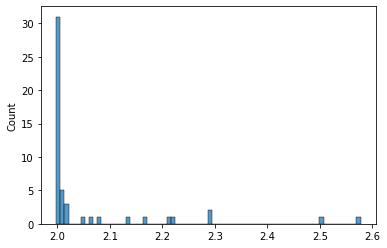

In [19]:
sns.histplot(Simple8192)

# Below, Part 2 demonstrates the impact of the range of the array versus the array size. 
    Since the designed functions search for values instead of indicies, array size doesn't dramatically impact the search performance as seen in figure 2. 
    Figure 2a and 2b displays the distribution of times for conducting simple and binary searches on an array of size 1,000,000 over 50 iterations.
    Figure 3a and 3b displays the distribution of times for conducting simple and binary searches on an array of range 1,000,000 and size 1,000,000 over 50 iterations.

## C. Experimenting with larger array lengths and larger range



## C1. Larger array experiment

In [20]:
Array_large = GenerateArray(1000000) #generates array of 1,000,000 elements with rg only 10,000; there's going to be a lot of duplicates
Array_large_rglarge = GenerateArray(rg_high=1000000,size= 1000000) #generates array of 1,000,000 with range of 1,000,000

In [21]:
np.max(Array_large_rglarge[0])

999998

In [22]:
Array_large[1], Array_large_rglarge[1]

(47.59220000005371, 47.21650000010413)

In [23]:
Simple1000000 = []
for i in range(0,50):
    mess = SimpleSearch(Array_large[0], np.max(Array_large[0]))
    Simple1000000.append(mess[0])


Binary1000000 = []
for i in range(0,50):
    mess = BinarySearch(Array_large[0], np.max(Array_large[0]))
    Binary1000000.append(mess[0])

## Figure 2a and 2b SimpleSearch and BinarySearch times for 50 iterations on an array of size 1,000,000

<AxesSubplot:ylabel='Count'>

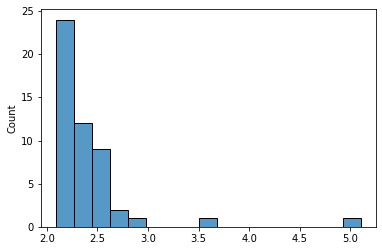

In [24]:
sns.histplot(Simple1000000)

<AxesSubplot:ylabel='Count'>

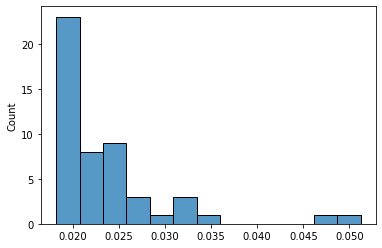

In [25]:
sns.histplot(Binary1000000)

## C2. Larger Range experiment

In [26]:
Simple1000000_rg = []
for i in range(0,50):
    mess = SimpleSearch(Array_large_rglarge[0], np.max(Array_large_rglarge[0]))
    Simple1000000_rg.append(mess[0])


Binary1000000_rg = []
for i in range(0,50):
    mess = BinarySearch(Array_large_rglarge[0], np.max(Array_large_rglarge[0]))
    Binary1000000_rg.append(mess[0])

## Fig. 3a and 3b. SimpleSearch and BinarySearch times for 50 iterations on an array of range and size 1,000,000

<AxesSubplot:ylabel='Count'>

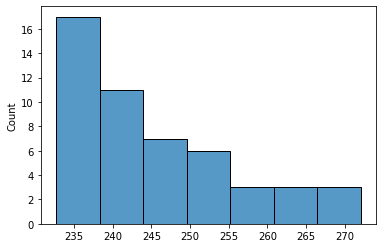

In [27]:
sns.histplot(Simple1000000_rg)

<AxesSubplot:ylabel='Count'>

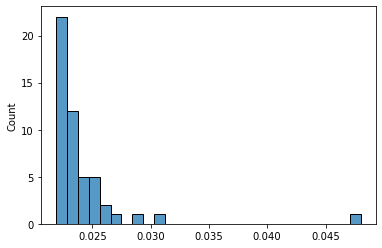

In [28]:
sns.histplot(Binary1000000_rg)

# Reimagining this assignment with larger range versus larger size

        Generage 4 arrays of range (low = 1 high = range) 100, 1000, 10000, 100000 containing 50 elements
        search for maximum of each array using simple and binary search
        Generate plots demonstrating linear vs log2 time

In [29]:
#GenerateArray(size, rg_low=1, rg_high=10000, sort_kind='mergesort')
rg100 = GenerateArray(size = 50, rg_high=100)
rg1000 = GenerateArray(size = 50, rg_high=1000)
rg10000 = GenerateArray(size = 50, rg_high=10000)
rg100000 = GenerateArray(size = 50, rg_high=100000)
rg1000000 = GenerateArray(size = 50, rg_high=1000000)

In [30]:
Simple_rg100 = SimpleSearch(rg100[0], np.max(rg100[0]))
Simple_rg1000 = SimpleSearch(rg1000[0], np.max(rg1000[0]))
Simple_rg10000 = SimpleSearch(rg10000[0], np.max(rg10000[0]))
Simple_rg100000 = SimpleSearch(rg100000[0], np.max(rg100000[0]))
Simple_rg1000000 = SimpleSearch(rg1000000[0], np.max(rg1000000[0]))

In [31]:
Binary_rg100 = BinarySearch(rg100[0], np.max(rg100[0]))
Binary_rg1000 = BinarySearch(rg1000[0], np.max(rg1000[0]))
Binary_rg10000 = BinarySearch(rg10000[0], np.max(rg10000[0]))
Binary_rg100000 = BinarySearch(rg100000[0], np.max(rg100000[0]))
Binary_rg1000000 = BinarySearch(rg1000000[0], np.max(rg1000000[0]))

In [32]:
rg_Summary = {
    'NumberOfElements': [len(rg100[0]), len(rg1000[0]), len(rg10000[0]), len(rg100000[0]), len(rg1000000[0])],
    'MaxRangeOfElements': [100, 1000, 10000, 100000, 1000000],  
    'SortTime (ms)': [rg100[1], rg1000[1], rg10000[1], rg100000[1], rg1000000[1]],
    'SimpleSearchTime (ms)': [Simple_rg100[0], Simple_rg1000[0], Simple_rg10000[0], Simple_rg100000[0], Simple_rg1000000[0]],
    'BinarySearchTime (ms)': [Binary_rg100[0], Binary_rg1000[0], Binary_rg10000[0], Binary_rg100000[0], Binary_rg1000000[0]], 
    'NumElementsInSearch_Simple':  [len(Simple_rg100[1]), len(Simple_rg1000[1]), len(Simple_rg10000[1]), len(Simple_rg100000[1]), len(Simple_rg1000000[1])],
    'NumElementsInSearch_Binary': [len(Binary_rg100[1]), len(Binary_rg1000[1]), len(Binary_rg10000[1]), len(Binary_rg100000[1]), len(Binary_rg1000000[1])],
        }

rg_df = pd.DataFrame.from_dict(rg_Summary)

# Discussion for part 2:

From this experiment it is evident of the efficiency of binary search when the range of the values within a given array/attribute/datastructure is wide. We can likewise extend the same conclusion to length of the array should we be searching on indciies instead of values. Shown in figures 4 and 5 are the timescales of the simple and binary searches on the arrays with ranges between 100-1,000,000. We can see the O(n) vs O(log2(n)) growth of the two algorigthms in terms of timescale for simple and binary searches respectively. This is directly due to the number of guesses performed between the two search methodologies; the number of guesses is shown in figure 6a and 6b for simple and binary searches.

In [33]:
rg_df

,NumberOfElements,MaxRangeOfElements,SortTime (ms),SimpleSearchTime (ms),BinarySearchTime (ms),NumElementsInSearch_Simple,NumElementsInSearch_Binary
0,50,100,0.0093,0.0277,0.0168,95,7
1,50,1000,0.0058,0.3496,0.0139,960,10
2,50,10000,0.0831,2.6792,0.0184,9959,14
3,50,100000,0.0125,23.0040,0.0218,99964,17
4,50,1000000,0.2516,239.1337,0.0254,971422,20


## Fig. 4a and 4b Search times for Simple and Binary searches as a function of the maxiumum range of the arrays 

<AxesSubplot:xlabel='MaxRangeOfElements', ylabel='SimpleSearchTime (ms)'>

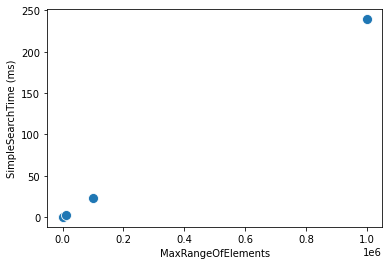

In [34]:
sns.scatterplot(
    data=rg_df,
    x="MaxRangeOfElements", y="SimpleSearchTime (ms)", s=100)

<AxesSubplot:xlabel='MaxRangeOfElements', ylabel='BinarySearchTime (ms)'>

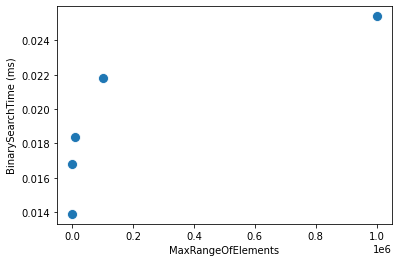

In [35]:
sns.scatterplot(
    data=rg_df,
    x="MaxRangeOfElements", y="BinarySearchTime (ms)", s=100)

## Melt our dataframe so we can plot on the same chart with seaborn

In [36]:
subset_rg_df = rg_df.copy().drop(columns=['NumberOfElements', 'SortTime (ms)'], axis=1)


In [37]:
long_rg_df = subset_rg_df.melt(id_vars=['MaxRangeOfElements'],
                    value_vars=['SimpleSearchTime (ms)', 'BinarySearchTime (ms)', 'NumElementsInSearch_Simple', 'NumElementsInSearch_Binary'],
        var_name='Attribute', value_name='Values')

In [38]:
display(long_rg_df.info())
display(long_rg_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MaxRangeOfElements  20 non-null     int64  
 1   Attribute           20 non-null     object 
 2   Values              20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


None

,MaxRangeOfElements,Attribute,Values
0,100,SimpleSearchTime (ms),0.0277
1,1000,SimpleSearchTime (ms),0.3496
2,10000,SimpleSearchTime (ms),2.6792
3,100000,SimpleSearchTime (ms),23.0040
4,1000000,SimpleSearchTime (ms),239.1337


## Fig. 5 Search times (logscale y-axis) as a function of the maxiumum range of the generated array (logscale x-axis)

[None, None]

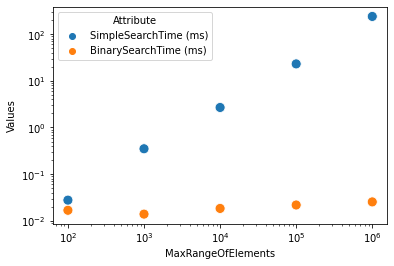

In [39]:
Attr_SearchTime = ['SimpleSearchTime (ms)', 'BinarySearchTime (ms)']

timeplot = sns.scatterplot(data = long_rg_df[long_rg_df['Attribute'].isin(Attr_SearchTime)],
    x='MaxRangeOfElements', hue='Attribute', y='Values', s=100)

timeplot.set(xscale="log", yscale='log')


In [40]:
rg_df

,NumberOfElements,MaxRangeOfElements,SortTime (ms),SimpleSearchTime (ms),BinarySearchTime (ms),NumElementsInSearch_Simple,NumElementsInSearch_Binary
0,50,100,0.0093,0.0277,0.0168,95,7
1,50,1000,0.0058,0.3496,0.0139,960,10
2,50,10000,0.0831,2.6792,0.0184,9959,14
3,50,100000,0.0125,23.0040,0.0218,99964,17
4,50,1000000,0.2516,239.1337,0.0254,971422,20


## Fig. 6a and 6b Demonstrating the search efficiency as the range of the array increases for simple and binary search (logscale for x-axis)

[None]

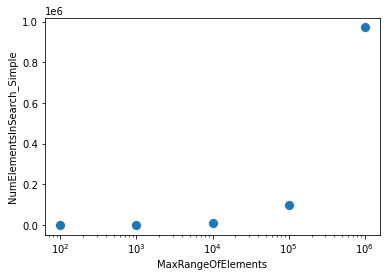

In [41]:
sns.scatterplot(
    data=rg_df,
    x="MaxRangeOfElements", y="NumElementsInSearch_Simple", markers=True, s=100).set(xscale='log')

[None]

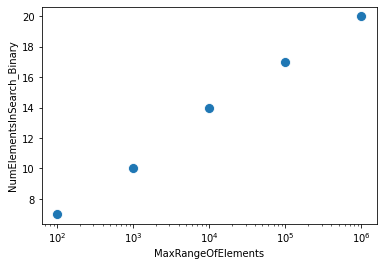

In [42]:
sns.scatterplot(
    data=rg_df,
    x="MaxRangeOfElements", y="NumElementsInSearch_Binary", markers=True, s=100).set(xscale='log')

# ------------------------ END ------------------------

    code graveyard 

In [43]:
### Archive this code
#generates five arrays of length 512, 1024, 2048, 8192
#five12 = np.random.randint(low=1, high=10000, size=512)
#ten24 = np.random.randint(low=1, high=10000, size=1024)
#twenty48 = np.random.randint(low=1, high=10000, size=2048)
#forty96 = np.random.randint(low=1, high=10000, size=4096)
#eight192 = np.random.randint(low=1, high=10000, size=8192)


In [44]:
### Archive this code

#sorts 5 arrays and stores duration required to sort in milliseconds
#start = datetime.now()
#five12.sort(kind='mergesort')
#end = datetime.now()
#five12_sort = (end-start).total_seconds()*1E3

#start = datetime.now()
#ten24.sort(kind='mergesort')
#end = datetime.now()
#ten24_sort = (end-start).total_seconds()*1E3

#start = datetime.now()
#twenty48.sort(kind='mergesort')
#end = datetime.now()
#twenty48_sort = (end-start).total_seconds()*1E3

#start = datetime.now()
#forty96.sort(kind='mergesort')
#end = datetime.now()
#forty96_sort = (end-start).total_seconds()*1E3

#start = datetime.now()
#eight192.sort(kind='mergesort')
#end = datetime.now()
#eight192_sort = (end-start).total_seconds()*1E3



In [45]:
### Archive this code.
#start = datetime.now() #time object for starting search
#end = SimpleSearch(eight192, np.max(eight192)) #end collects the register of guesses and time to execute

#duration =end[0] - start #calculates the timedelta between execution and completion
#eight192_simple = duration.total_seconds()*1E3 #stores the time required in milliseconds



#start = datetime.now() #time object for starting search
#end = BinarySearch(eight192, np.max(eight192)) #end collects the register of guesses and time to execute
#duration =end[0] - start #calculates the timedelta between execution and completion
#eight192_binary=duration.total_seconds()*1E3 #stores the time required in milliseconds